Problem Statement-Problem Statement-The primary goal is to visualize the data and establish trends or important characteristics, if any.
The next important objective is to create a pycaret model that can predict the class of the patient by the virtue of its input.

In [11]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# pycaret library

In [12]:
# !pip install pycaret

In [13]:
import pycaret

In [14]:
from pycaret.datasets import get_data
dataset = pd.read_csv('/content/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:
dataset.shape

(583, 11)

In [16]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [17]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [19]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## splitting the data into training and test

In [20]:
# training data
data = dataset.sample(frac=0.90, random_state=1).reset_index(drop=True)
# test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [21]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
520,45,Male,1.7,0.8,315,12,38,6.3,2.1,0.5,1
521,50,Male,4.2,2.3,450,69,50,7.0,3.0,0.7,1
522,50,Female,1.0,0.5,239,16,39,7.5,3.7,0.9,1
523,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1
524,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.9,2


Impute missing values

In [22]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [23]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [24]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes
data_unseen['Gender'] = data_unseen['Gender'].astype('category')
data_unseen['Gender'] = data_unseen['Gender'].cat.codes

In [25]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=1)


In [26]:
print("Data for Modeling :" + str(data.shape))
print("###########"*10)
print("Unseen Data for Prediction :" + str(data_unseen.shape))

Data for Modeling :(525, 11)
##############################################################################################################
Unseen Data for Prediction :(58, 11)


In [27]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,38,1,1.7,0.7,859,89,48,6.0,3.0,1.00,1
1,12,1,0.8,0.2,302,47,67,6.7,3.5,1.10,2
2,57,1,1.4,0.7,470,62,88,5.6,2.5,0.80,1
3,48,1,3.2,1.6,257,33,116,5.7,2.2,0.62,1
4,40,1,14.5,6.4,358,50,75,5.7,2.1,0.50,1


In [28]:
from pycaret.classification import *

In [29]:
exp_clf101 = setup(data=data, target='Dataset' , session_id=123)

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(525, 11)"
5,Transformed data shape,"(525, 11)"
6,Transformed train set shape,"(367, 11)"
7,Transformed test set shape,"(158, 11)"
8,Numeric features,10
9,Preprocess,True


In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7410,0.7851,0.3809,0.5275,0.4337,0.2832,0.2894,0.2560
lightgbm,Light Gradient Boosting Machine,0.7303,0.7578,0.4555,0.5182,0.4702,0.2974,0.3042,0.2510
rf,Random Forest Classifier,0.7274,0.7680,0.3091,0.5242,0.3836,0.2258,0.2407,0.2420
gbc,Gradient Boosting Classifier,0.7252,0.7375,0.3882,0.5185,0.4370,0.2641,0.2712,0.2000
dummy,Dummy Classifier,0.7194,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1760
xgboost,Extreme Gradient Boosting,0.7140,0.7486,0.4073,0.4858,0.4328,0.2493,0.2544,0.1280
ridge,Ridge Classifier,0.7139,0.0000,0.0000,0.0000,0.0000,-0.0105,-0.0213,0.0990
lr,Logistic Regression,0.7084,0.7362,0.1655,0.4533,0.2363,0.1044,0.1263,0.5360
lda,Linear Discriminant Analysis,0.7057,0.7125,0.0200,0.1000,0.0333,-0.0085,-0.0207,0.1140
svm,SVM - Linear Kernel,0.7029,0.0000,0.1273,0.1917,0.1428,0.0562,0.0532,0.0980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [31]:
# ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
#                      criterion='gini', max_depth=None, max_features='auto',
#                      max_leaf_nodes=None, max_samples=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
#                      oob_score=False, random_state=123, verbose=0,
#                      warm_start=False)

In [32]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.6667,0.1000,0.3333,0.1538,0.0333,0.0422
1,0.7838,0.7889,0.4000,0.6667,0.5000,0.3729,0.3927
2,0.7027,0.6741,0.1000,0.3333,0.1538,0.0333,0.0422
3,0.6486,0.5481,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8427,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7622,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.9021,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6667,0.7269,0.1000,0.2500,0.1429,-0.0189,-0.0219
8,0.7222,0.7038,0.2000,0.5000,0.2857,0.1509,0.1754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7568,0.7963,0.3000,0.6000,0.4000,0.2681,0.2935
1,0.8378,0.8981,0.7000,0.7000,0.7000,0.5889,0.5889
2,0.6486,0.7093,0.3000,0.3333,0.3158,0.0803,0.0805
3,0.7297,0.7444,0.5000,0.5000,0.5000,0.3148,0.3148
4,0.7838,0.8304,0.3636,0.8000,0.5000,0.3859,0.4348
5,0.8378,0.8741,0.5455,0.8571,0.6667,0.5664,0.5917
6,0.6486,0.7640,0.0000,0.0000,0.0000,-0.1007,-0.1555
7,0.7222,0.7481,0.3000,0.5000,0.3750,0.2105,0.2219
8,0.6944,0.6827,0.3000,0.4286,0.3529,0.1610,0.1654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [35]:
x_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
67,13,0,0.7,0.1,182,24,19,8.9,4.9,1.20
469,70,1,0.6,0.1,862,76,180,6.3,2.7,0.75
484,58,1,0.9,0.2,1100,25,36,7.1,3.5,0.90
464,42,1,0.7,0.2,197,64,33,5.8,2.4,0.70
289,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90


In [36]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("#########"*10)
print("Test Accuracy : ", accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.7330508474576272
##########################################################################################
Test Accuracy :  0.7735849056603774


In [40]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr_model, x_train, y_train, cv=10)
test_accuracy = cross_val_score(lr_model, x_test, y_test, cv=10)
print(training_accuracy.mean())
print("############"*10)
print(test_accuracy.mean())

0.7247783687943262
########################################################################################################################
0.74


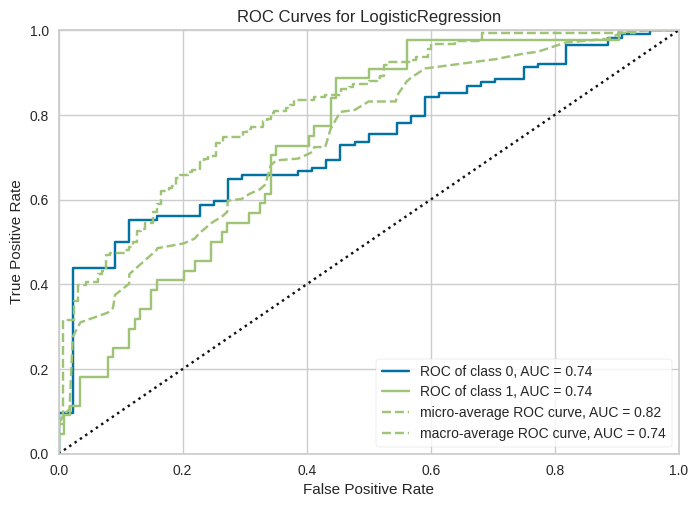

In [41]:
plot_model(lr, plot='auc')

In [42]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.6704,0.1000,0.5000,0.1667,0.0842,0.1237
1,0.7297,0.7556,0.2000,0.5000,0.2857,0.1553,0.1801
2,0.7297,0.6963,0.2000,0.5000,0.2857,0.1553,0.1801
3,0.6486,0.5444,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8636,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7797,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.9126,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6944,0.7231,0.1000,0.3333,0.1538,0.0294,0.0374
8,0.6667,0.6962,0.0000,0.0000,0.0000,-0.1020,-0.1504


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


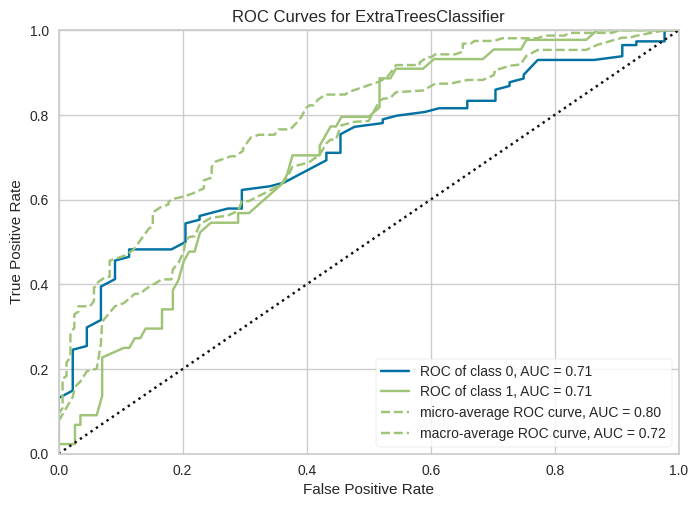

In [44]:
plot_model(et, plot='auc')

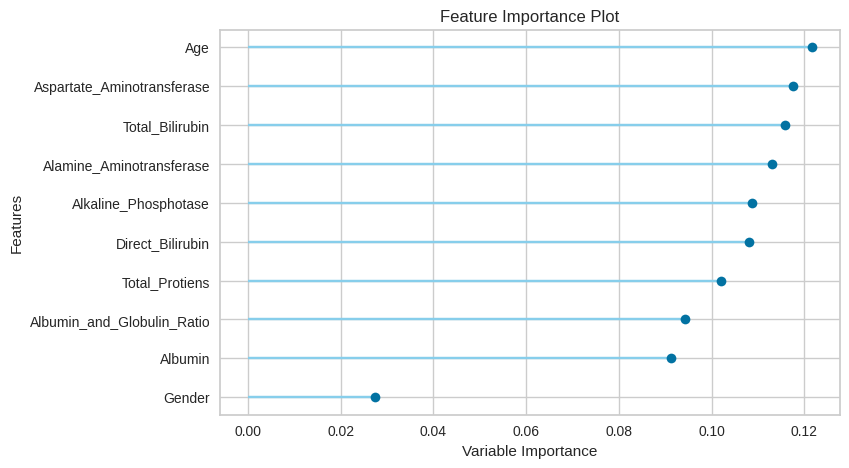

In [45]:
# which feature is more significant
plot_model(tuned_et, plot='feature')

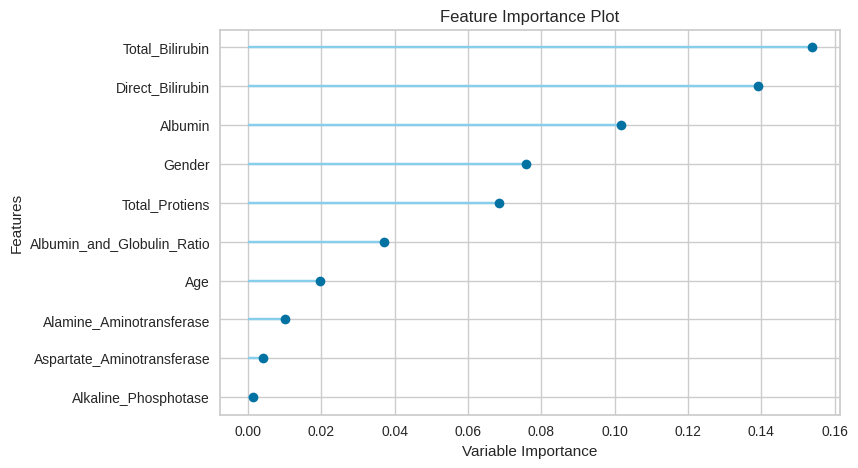

In [46]:
plot_model(tuned_lr, plot='feature')

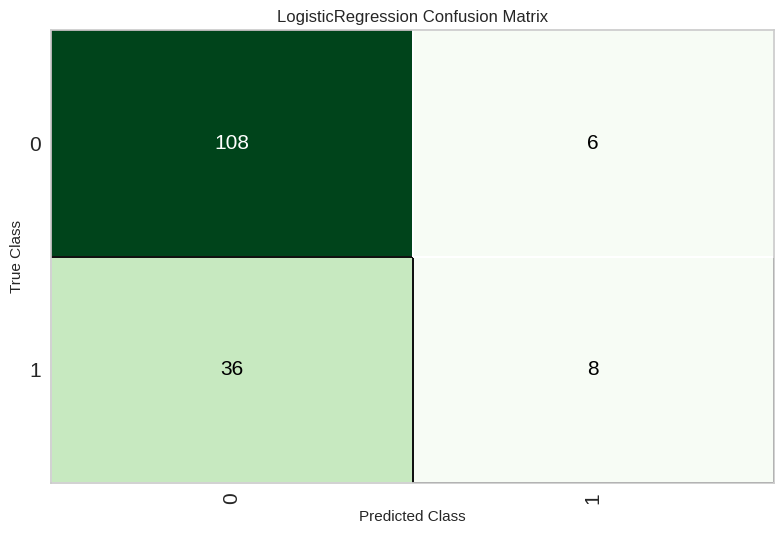

In [47]:
plot_model(tuned_lr, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

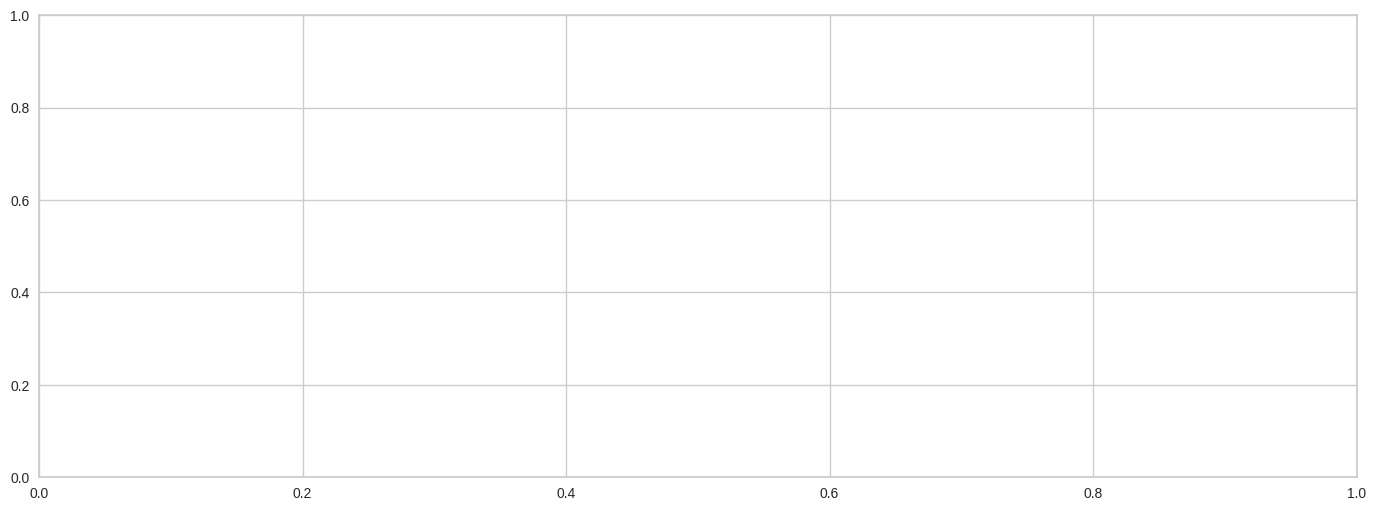

In [48]:
# Evaluate the model
evaluate_model(tuned_lr)

In [49]:
# Test data - unseen data
unseen_prediction = predict_model(tuned_lr, data=data_unseen)
unseen_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7759,0.8912,0,0,0,0.1045,0.2348


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
0,53,0,0.9,0.2,210,35,32,8.0,3.9,0.9,2,1,0.6507
1,46,1,9.4,5.2,268,21,63,6.4,2.8,0.8,1,1,0.9327
2,40,1,3.5,1.6,298,68,200,7.1,3.4,0.9,1,1,0.8981
3,45,1,1.7,0.8,315,12,38,6.3,2.1,0.5,1,1,0.6760
4,55,1,3.3,1.5,214,54,152,5.1,1.8,0.5,1,1,0.8790


In [50]:
save_model(tuned_lr, 'tuned_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Aspartate_Aminotransferase...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                      